Solve:

1x -2y = 1

2x +1y = 7


In [131]:
import numpy as np


In [11]:
A= [[1,-2],
    [2, 1]]

b= [1, 
    7]


In [12]:
A= np.array(A)
b= np.array(b)
A

array([[ 1, -2],
       [ 2,  1]])

In [13]:
b

array([1, 7])

In [15]:
x= np.linalg.inv(A) @ b
x

array([3., 1.])

In [16]:
A@x

array([1., 7.])

In [18]:
A@x == b

array([False, False])

In [17]:
np.isclose(A@x, b)

array([ True,  True])

In [20]:
x= np.linalg.solve(A,b)
x

array([3., 1.])

In [23]:
np.matmul?
np.linalg.inv?
np.linalg.solve?

Signature: np.linalg.solve(a, b)
Docstring:
Solve a linear matrix equation, or system of linear scalar equations.

Computes the "exact" solution, `x`, of the well-determined, i.e., full
rank, linear matrix equation `ax = b`.

Parameters
----------
a : (..., M, M) array_like
    Coefficient matrix.
b : {(..., M,), (..., M, K)}, array_like
    Ordinate or "dependent variable" values.

Returns
-------
x : {(..., M,), (..., M, K)} ndarray
    Solution to the system a x = b.  Returned shape is identical to `b`.

Raises
------
LinAlgError
    If `a` is singular or not square.

See Also
--------
scipy.linalg.solve : Similar function in SciPy.

Notes
-----

.. versionadded:: 1.8.0

Broadcasting rules apply, see the `numpy.linalg` documentation for
details.

The solutions are computed using LAPACK routine ``_gesv``.

`a` must be square and of full-rank, i.e., all rows (or, equivalently,
columns) must be linearly independent; if either is not true, use
`lstsq` for the least-squares best "solutio


# Exercise 001:

- 自己出5題 多變數的線性方城組，逐一解答。
- 方程組有可能無解或無限多組解，那時會如何？



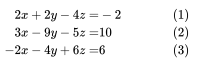

In [33]:
A= [[2,2,-4],
    [3,-9,-5],
    [-2,-4,6]]

b= [-2,10,6]

x= np.linalg.solve(A, b)
x
    

array([ 2., -1.,  1.])

In [38]:
np.linalg.inv(A)@b

array([ 2., -1.,  1.])

In [42]:
np.matmul(A,A)

array([[ 18,   2, -42],
       [-11, 107,   3],
       [-28,   8,  64]])

In [44]:
A= np.array(A)
A

array([[ 2,  2, -4],
       [ 3, -9, -5],
       [-2, -4,  6]])

In [46]:
P= np.eye(3)


Docstring:
a.swapaxes(axis1, axis2)

Return a view of the array with `axis1` and `axis2` interchanged.

Refer to `numpy.swapaxes` for full documentation.

See Also
--------
numpy.swapaxes : equivalent function
Type:      builtin_function_or_method


In [49]:
A= [[1,2],
    [3,4]]
A= np.array(A)
A

array([[1, 2],
       [3, 4]])

In [50]:
A@A

array([[ 7, 10],
       [15, 22]])

In [53]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [67]:
b= np.array([5,6])
b

array([5, 6])

In [68]:
np.linalg.solve(A,b)

array([-4. ,  4.5])

In [69]:
np.linalg.det(A)

-2.0000000000000004

In [70]:
A

array([[1, 2],
       [3, 4]])

In [77]:
A.trace?

Docstring:
a.trace(offset=0, axis1=0, axis2=1, dtype=None, out=None)

Return the sum along diagonals of the array.

Refer to `numpy.trace` for full documentation.

See Also
--------
numpy.trace : equivalent function
Type:      builtin_function_or_method


# Solving linear least-squares problems and pseudo-inverses
- https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html


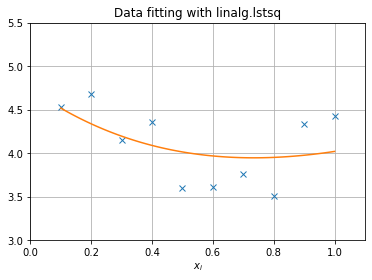

In [114]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

rng= np.random.default_rng()

c1, c2= 5.0, 2.0

i= np.r_[1:11]

xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * rng.standard_normal(len(yi))

A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.grid()
plt.show()


In [98]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

rng= np.random.default_rng()
rng.standard_normal(100)


array([ 7.00429736e-01,  1.35018161e+00,  1.28620022e+00,  4.79569515e-01,
       -1.06957860e+00, -9.59078834e-01,  1.46936656e+00, -7.79991704e-01,
        7.54252088e-01, -7.93243575e-01, -9.60469422e-01, -1.32315110e+00,
        9.95530212e-01,  1.10368675e+00,  1.47056723e+00,  1.16118278e+00,
        4.99418155e-01,  1.25488721e-01, -1.70085052e+00, -1.36965100e+00,
       -3.69929843e-01,  2.40655790e-01, -1.46355074e-01, -1.28460482e+00,
       -7.71117526e-02, -1.12734290e+00, -8.35662611e-01,  6.88012846e-01,
        9.66102865e-02, -1.00402706e+00,  1.20906111e+00, -7.01151394e-02,
       -9.62765419e-01,  3.99567738e-01,  1.33907798e+00,  9.22358157e-01,
       -6.49691926e-03, -4.55680333e-01,  1.60286382e+00,  9.48833720e-04,
       -2.44058756e-01,  1.06201455e+00, -1.16808610e+00,  5.69913658e-01,
       -1.78243125e-01,  1.55383300e-02, -6.43267704e-01,  7.23875036e-02,
        4.61389944e-01, -9.32674668e-02, -5.34812559e-01,  4.71778466e-01,
        9.14499538e-02,  

In [115]:
c1, c2= 5.0, 2.0
i= np.arange(1,11) #np.r_[1:11]
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [117]:
xi= 0.1*i
yi= c1*np.exp(-xi) + c2*xi
zi= yi + 0.05 * np.max(yi) * rng.standard_normal(len(yi))

xi, yi, zi

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([4.72418709, 4.49365377, 4.3040911 , 4.15160023, 4.0326533 ,
        3.94405818, 3.88292652, 3.84664482, 3.8328483 , 3.83939721]),
 array([4.50454504, 4.25601133, 4.88563644, 4.14236584, 4.33418676,
        4.16350454, 4.04420918, 4.04125329, 3.83178297, 4.0249123 ]))

In [118]:
A= np.c_[
    np.exp(-xi)[:, np.newaxis], 
    xi[:, np.newaxis]]
A

array([[0.90483742, 0.1       ],
       [0.81873075, 0.2       ],
       [0.74081822, 0.3       ],
       [0.67032005, 0.4       ],
       [0.60653066, 0.5       ],
       [0.54881164, 0.6       ],
       [0.4965853 , 0.7       ],
       [0.44932896, 0.8       ],
       [0.40656966, 0.9       ],
       [0.36787944, 1.        ]])

In [ ]:
c, resid, rank, sigma = linalg.lstsq(A, zi)

xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [119]:
linalg.lstsq?

Signature:
linalg.lstsq(
    a,
    b,
    cond=None,
    overwrite_a=False,
    overwrite_b=False,
    check_finite=True,
    lapack_driver=None,
)
Docstring:
Compute least-squares solution to equation Ax = b.

Compute a vector x such that the 2-norm ``|b - A x|`` is minimized.

Parameters
----------
a : (M, N) array_like
    Left-hand side array
b : (M,) or (M, K) array_like
    Right hand side array
cond : float, optional
    Cutoff for 'small' singular values; used to determine effective
    rank of a. Singular values smaller than
    ``rcond * largest_singular_value`` are considered zero.
overwrite_a : bool, optional
    Discard data in `a` (may enhance performance). Default is False.
overwrite_b : bool, optional
    Discard data in `b` (may enhance performance). Default is False.
check_finite : bool, optional
    Whether to check that the input matrices contain only finite numbers.
    Disabling may give a performance gain, but may result in problems
    (crashes, non-termination

In [111]:
 
    np.r_[0.1:1.0:10j]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [106]:
np.r_?

Type:        RClass
String form: <numpy.lib.index_tricks.RClass object at 0x00000165BCFEB0A0>
Length:      0
File:        m:\programdata\anaconda3\lib\site-packages\numpy\lib\index_tricks.py
Docstring:  
Translates slice objects to concatenation along the first axis.

This is a simple way to build up arrays quickly. There are two use cases.

1. If the index expression contains comma separated arrays, then stack
   them along their first axis.
2. If the index expression contains slice notation or scalars then create
   a 1-D array with a range indicated by the slice notation.

If slice notation is used, the syntax ``start:stop:step`` is equivalent
to ``np.arange(start, stop, step)`` inside of the brackets. However, if
``step`` is an imaginary number (i.e. 100j) then its integer portion is
interpreted as a number-of-points desired and the start and stop are
inclusive. In other words ``start:stop:stepj`` is interpreted as
``np.linspace(start, stop, step, endpoint=1)`` inside of the bracke

In [112]:
np.r_?

Type:        RClass
String form: <numpy.lib.index_tricks.RClass object at 0x00000165BCFEB0A0>
Length:      0
File:        m:\programdata\anaconda3\lib\site-packages\numpy\lib\index_tricks.py
Docstring:  
Translates slice objects to concatenation along the first axis.

This is a simple way to build up arrays quickly. There are two use cases.

1. If the index expression contains comma separated arrays, then stack
   them along their first axis.
2. If the index expression contains slice notation or scalars then create
   a 1-D array with a range indicated by the slice notation.

If slice notation is used, the syntax ``start:stop:step`` is equivalent
to ``np.arange(start, stop, step)`` inside of the brackets. However, if
``step`` is an imaginary number (i.e. 100j) then its integer portion is
interpreted as a number-of-points desired and the start and stop are
inclusive. In other words ``start:stop:stepj`` is interpreted as
``np.linspace(start, stop, step, endpoint=1)`` inside of the bracke

Type:        NoneType
String form: None
Docstring:   <no docstring>


In [123]:
np.linalg.lstsq?

Signature: np.linalg.lstsq(a, b, rcond='warn')
Docstring:
Return the least-squares solution to a linear matrix equation.

Computes the vector x that approximatively solves the equation
``a @ x = b``. The equation may be under-, well-, or over-determined
(i.e., the number of linearly independent rows of `a` can be less than,
equal to, or greater than its number of linearly independent columns).
If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation. Else, `x` minimizes the
Euclidean 2-norm :math:`|| b - a x ||`.

Parameters
----------
a : (M, N) array_like
    "Coefficient" matrix.
b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.
rcond : float, optional
    Cut-off ratio for small singular values of `a`.
    For the purposes of rank determination, singular values are treated
    as zero if they ar

#  the least-squares solution to a linear matrix equation

- https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
    

In [125]:
x= np.array([ 0,  1,   2,    3])
y= np.array([-1,  0.2, 0.9,  2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [129]:
np.linalg.lstsq(A, y) #, rcond=None) #[0]
#m, c

<ipython-input-129-3573b3d582a7>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A, y) #, rcond=None) #[0]


(array([ 1.  , -0.95]), array([0.05]), 2, array([4.10003045, 1.09075677]))

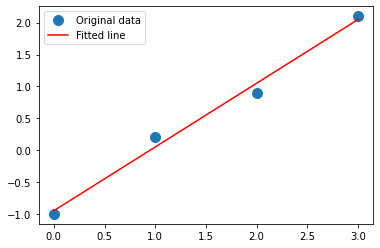

In [124]:
import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

In [130]:
np.linalg.lstsq?

Signature: np.linalg.lstsq(a, b, rcond='warn')
Docstring:
Return the least-squares solution to a linear matrix equation.

Computes the vector x that approximatively solves the equation
``a @ x = b``. The equation may be under-, well-, or over-determined
(i.e., the number of linearly independent rows of `a` can be less than,
equal to, or greater than its number of linearly independent columns).
If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation. Else, `x` minimizes the
Euclidean 2-norm :math:`|| b - a x ||`.

Parameters
----------
a : (M, N) array_like
    "Coefficient" matrix.
b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.
rcond : float, optional
    Cut-off ratio for small singular values of `a`.
    For the purposes of rank determination, singular values are treated
    as zero if they ar